In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
data=pd.read_excel("指数行情序列.xlsx")
data

,Unnamed: 0,涨跌幅\n[单位] %,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,时间,传媒(中信),综合金融(中信),综合(中信),计算机(中信),通信(中信),电子(中信),交通运输(中信),房地产(中信),非银行金融(中信),...,机械(中信),轻工制造(中信),建材(中信),建筑(中信),基础化工(中信),钢铁(中信),电力及公用事业(中信),有色金属(中信),煤炭(中信),石油石化(中信)
1,2010-01-04 00:00:00,1.0882,0,0.5541,2.2237,0.6334,4.7988,-0.4053,-1.7068,-2.0671,...,-0.2802,0.0392,-0.4285,-0.8218,0.9583,-0.7454,-0.4567,-0.2638,-1.0463,-0.6468
2,2010-01-05 00:00:00,2.0994,0,0.2382,2.0477,2.3051,3.6512,1.3595,-2.1111,3.3974,...,0.461,0.7132,0.538,0.1546,0.9805,-0.3056,0.5983,3.0683,3.3193,1.6092
3,2010-01-06 00:00:00,-0.5163,0,-0.9188,0.0596,-1.329,0.9439,-0.4724,0.193,-1.4066,...,0.4472,-0.1329,-0.0046,-0.0274,0.0762,0.7287,0.0203,0.2751,0.196,-0.8722
4,2010-01-07 00:00:00,-1.3169,0,-2.4652,-3.139,-3.1063,-1.2447,-1.8111,-0.6471,-2.0847,...,-2.328,-1.7598,-2.4147,-1.5002,-1.5664,-2.5009,-1.9252,-1.1341,-2.0042,-1.7771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,2022-03-11 00:00:00,0.96,0.6482,0.3974,1.0137,1.0509,-0.1584,1.3619,0.2236,1.7394,...,0.2434,0.444,-0.5102,-1.6117,0.4535,-0.7379,-1.238,-0.4658,0.1361,-0.468
2962,2022-03-14 00:00:00,-3.037,-2.7831,-2.7255,-3.0197,-2.8876,-3.2873,-3.872,-1.9866,-1.5852,...,-2.7913,-2.5986,-2.9468,-2.1395,-2.2441,-3.0428,-3.0449,-3.8422,-3.6993,-2.0798
2963,2022-03-15 00:00:00,-5.7201,-3.7441,-5.0317,-3.8913,-4.2795,-4.0305,-5.7175,-7.4271,-4.6831,...,-4.882,-5.6721,-6.414,-5.6353,-4.2449,-7.3415,-6.3021,-4.9758,-8.1223,-5.3197
2964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
column=data.iloc[0,:].values
print(column)
indexData=data.iloc[1:-2,:]
indexData.columns=column
# data1["时间"]=pd.to_datetime(data1["时间"])
indexData=indexData.set_index("时间")

['时间' '传媒(中信)' '综合金融(中信)' '综合(中信)' '计算机(中信)' '通信(中信)' '电子(中信)' '交通运输(中信)'
 '房地产(中信)' '非银行金融(中信)' '银行(中信)' '农林牧渔(中信)' '食品饮料(中信)' '医药(中信)' '纺织服装(中信)'
 '家电(中信)' '消费者服务(中信)' '商贸零售(中信)' '汽车(中信)' '国防军工(中信)' '电力设备及新能源(中信)'
 '机械(中信)' '轻工制造(中信)' '建材(中信)' '建筑(中信)' '基础化工(中信)' '钢铁(中信)' '电力及公用事业(中信)'
 '有色金属(中信)' '煤炭(中信)' '石油石化(中信)']


In [3]:
indexData.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-07',
               '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11',
               '2022-03-14', '2022-03-15'],
              dtype='datetime64[ns]', name='时间', length=2963, freq=None)

In [4]:
indexData

,传媒(中信),综合金融(中信),综合(中信),计算机(中信),通信(中信),电子(中信),交通运输(中信),房地产(中信),非银行金融(中信),银行(中信),...,机械(中信),轻工制造(中信),建材(中信),建筑(中信),基础化工(中信),钢铁(中信),电力及公用事业(中信),有色金属(中信),煤炭(中信),石油石化(中信)
时间,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1.0882,0,0.5541,2.2237,0.6334,4.7988,-0.4053,-1.7068,-2.0671,-1.9753,...,-0.2802,0.0392,-0.4285,-0.8218,0.9583,-0.7454,-0.4567,-0.2638,-1.0463,-0.6468
2010-01-05,2.0994,0,0.2382,2.0477,2.3051,3.6512,1.3595,-2.1111,3.3974,0.6144,...,0.461,0.7132,0.538,0.1546,0.9805,-0.3056,0.5983,3.0683,3.3193,1.6092
2010-01-06,-0.5163,0,-0.9188,0.0596,-1.329,0.9439,-0.4724,0.193,-1.4066,-1.6791,...,0.4472,-0.1329,-0.0046,-0.0274,0.0762,0.7287,0.0203,0.2751,0.196,-0.8722
2010-01-07,-1.3169,0,-2.4652,-3.139,-3.1063,-1.2447,-1.8111,-0.6471,-2.0847,-1.9591,...,-2.328,-1.7598,-2.4147,-1.5002,-1.5664,-2.5009,-1.9252,-1.1341,-2.0042,-1.7771
2010-01-08,2.7215,0,1.4399,3.0307,1.4063,3.4581,1.101,1.4663,0.7621,0.6076,...,0.0893,0.9442,0.8223,0.5464,0.6421,0.1827,0.8489,-1.1116,-1.1816,0.1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09,-0.8003,-1.9389,-1.6995,-1.003,-0.5522,-0.0962,-1.6322,-3.0898,-2.5289,-1.6786,...,-1.4012,-0.8407,-1.9106,-0.1003,-1.4412,-2.0547,-0.0723,-2.3269,2.1462,-2.8191
2022-03-10,0.7111,0.7181,2.6296,0.4859,0.6735,1.1332,1.5184,0.6909,-0.0557,0.7071,...,1.6933,1.1188,2.8866,1.0359,3.2498,1.7053,1.4822,1.0727,0.2183,2.2748
2022-03-11,0.96,0.6482,0.3974,1.0137,1.0509,-0.1584,1.3619,0.2236,1.7394,0.5308,...,0.2434,0.444,-0.5102,-1.6117,0.4535,-0.7379,-1.238,-0.4658,0.1361,-0.468


In [5]:
monthData=pd.read_excel("中信行业指数月行情 (1).xlsx")
# monthData=monthData.iloc[0:-2]
monthData=monthData.set_index("日期")
# monthData=monthData.round(2)
monthData

,石油石化(中信)CI005001.WI,煤炭(中信)CI005002.WI,有色金属(中信)CI005003.WI,电力及公用事业(中信)CI005004.WI,钢铁(中信)CI005005.WI,基础化工(中信)CI005006.WI,建筑(中信)CI005007.WI,建材(中信)CI005008.WI,轻工制造(中信)CI005009.WI,机械(中信)CI005010.WI,...,农林牧渔(中信)CI005020.WI,银行(中信)CI005021.WI,非银行金融(中信)CI005022.WI,房地产(中信)CI005023.WI,交通运输(中信)CI005024.WI,电子(中信)CI005025.WI,通信(中信)CI005026.WI,计算机(中信)CI005027.WI,传媒(中信)CI005028.WI,综合(中信)CI005029.WI
日期,,,,,,,,,,,,,,,,,,,,,
2005-01-31,-13.9690,-9.5245,-8.0745,-8.8131,-1.5821,-6.3275,-7.1149,-6.6128,-8.3446,-4.8162,...,-8.0687,-1.4896,-15.1644,0.5202,-4.8572,-8.3556,-1.8882,-9.5807,-7.5477,-8.4641
2005-02-28,11.9650,13.0761,14.1099,7.8857,7.4207,10.7023,11.4503,9.9195,6.7891,11.9321,...,10.3889,6.5740,12.2011,7.9023,7.2900,19.4960,7.5152,9.1352,10.5189,8.7571
2005-03-31,-8.2533,-10.7633,-11.1822,-8.8172,-9.7204,-6.8936,-14.6377,-13.8937,-11.7231,-9.9243,...,-11.6173,-8.7225,-18.8932,-12.8411,-2.6963,-14.6794,-16.0760,-15.6435,-13.9923,-15.3942
2005-04-29,-1.9008,1.5134,-1.7263,-0.9859,-10.1365,-0.4672,-6.2489,-10.6926,-3.9307,-2.2792,...,-6.1226,8.8066,7.3853,-4.1588,3.0122,-12.0486,-9.6441,-12.9527,-12.6376,-9.1439
2005-05-31,-10.7732,-13.2142,-9.9106,-6.3934,-4.8186,-11.0753,-3.7497,-3.2051,-3.6816,-8.8559,...,-5.1731,-5.7882,-5.4555,-8.3962,-10.6592,-2.0689,-3.2934,-0.2249,-1.6234,-3.1886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-29,-0.8013,-1.3948,1.4402,-1.9450,1.1952,-0.8704,-2.0505,5.1560,-0.5028,-1.3650,...,-9.8556,-1.2780,-3.7191,-1.1843,-2.4934,3.0385,-1.7058,-2.8458,0.4009,-5.6125
2019-12-31,4.8211,5.8974,15.0904,2.4374,5.5586,10.2638,5.5741,14.7197,8.8665,9.4927,...,1.5902,4.0152,10.0953,10.5905,6.3202,11.4052,7.3271,7.7489,12.9765,10.1257
2020-01-23,-2.5969,-6.0910,-2.3794,-3.0434,-6.0591,-0.3804,-2.9665,-6.3538,0.8223,-0.7995,...,-4.4567,-4.5914,-4.1030,-6.5664,-6.3940,14.5651,3.6997,6.4790,4.0343,-0.6920


In [6]:
monthData.index

DatetimeIndex(['2005-01-31', '2005-02-28', '2005-03-31', '2005-04-29',
               '2005-05-31', '2005-06-30', '2005-07-29', '2005-08-31',
               '2005-09-30', '2005-10-31',
               ...
               '2019-06-28', '2019-07-31', '2019-08-30', '2019-09-30',
               '2019-10-31', '2019-11-29', '2019-12-31', '2020-01-23',
               '2020-02-28', '2020-03-31'],
              dtype='datetime64[ns]', name='日期', length=183, freq=None)

In [7]:
#累乘后得到每天的收盘价
price=((monthData/100)+1).cumprod()
price

,石油石化(中信)CI005001.WI,煤炭(中信)CI005002.WI,有色金属(中信)CI005003.WI,电力及公用事业(中信)CI005004.WI,钢铁(中信)CI005005.WI,基础化工(中信)CI005006.WI,建筑(中信)CI005007.WI,建材(中信)CI005008.WI,轻工制造(中信)CI005009.WI,机械(中信)CI005010.WI,...,农林牧渔(中信)CI005020.WI,银行(中信)CI005021.WI,非银行金融(中信)CI005022.WI,房地产(中信)CI005023.WI,交通运输(中信)CI005024.WI,电子(中信)CI005025.WI,通信(中信)CI005026.WI,计算机(中信)CI005027.WI,传媒(中信)CI005028.WI,综合(中信)CI005029.WI
日期,,,,,,,,,,,,,,,,,,,,,
2005-01-31,0.860310,0.904755,0.919255,0.911869,0.984179,0.936725,0.928851,0.933872,0.916554,0.951838,...,0.919313,0.985104,0.848356,1.005202,0.951428,0.916444,0.981118,0.904193,0.924523,0.915359
2005-02-28,0.963246,1.023062,1.048961,0.983776,1.057212,1.036976,1.035207,1.026507,0.978780,1.065412,...,1.014820,1.049865,0.951865,1.084636,1.020787,1.095114,1.054851,0.986793,1.021773,0.995518
2005-03-31,0.883747,0.912946,0.931664,0.897035,0.954447,0.965491,0.883677,0.883888,0.864036,0.959678,...,0.896925,0.958290,0.772027,0.945357,0.993264,0.934358,0.885273,0.832424,0.878803,0.842266
2005-04-29,0.866948,0.926763,0.915581,0.888191,0.857699,0.960980,0.828457,0.789377,0.830074,0.937805,...,0.842010,1.042683,0.829044,0.906041,1.023183,0.821781,0.799897,0.724603,0.767744,0.765250
2005-05-31,0.773550,0.804299,0.824841,0.831405,0.816370,0.854549,0.797392,0.764077,0.799514,0.854754,...,0.798452,0.982330,0.783815,0.829968,0.914120,0.804779,0.773553,0.722973,0.755280,0.740849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-29,2.115025,1.537063,3.452342,2.203699,1.252239,3.740421,2.978190,6.045228,2.980472,4.458246,...,6.005458,7.752244,9.178170,6.209356,1.661708,5.544095,4.271715,4.952757,2.338277,3.294305
2019-12-31,2.216992,1.627710,3.973315,2.257412,1.321846,4.124330,3.144197,6.935068,3.244736,4.881454,...,6.100957,8.063512,10.104734,6.866957,1.766731,6.176410,4.584708,5.336541,2.641704,3.627877
2020-01-23,2.159419,1.528566,3.878773,2.188710,1.241754,4.108641,3.050925,6.494428,3.271417,4.842427,...,5.829056,7.693284,9.690137,6.416045,1.653766,7.076010,4.754328,5.682295,2.748278,3.602772


In [175]:
def maxDown(x):
#     print(x)
#     print(len(x))
    list_=[]
    for i in range(len(x)):
        if i==0:
            list_.append(0)
        else:
            list_.append(1-x.iloc[i]/x.iloc[0:i].max())
    return list_
#最大回撤
price.apply(maxDown).max()

石油石化(中信)CI005001.WI        0.723647
煤炭(中信)CI005002.WI          0.753082
有色金属(中信)CI005003.WI        0.845509
电力及公用事业(中信)CI005004.WI     0.623736
钢铁(中信)CI005005.WI          0.776264
基础化工(中信)CI005006.WI        0.637836
建筑(中信)CI005007.WI          0.583054
建材(中信)CI005008.WI          0.721166
轻工制造(中信)CI005009.WI        0.725683
机械(中信)CI005010.WI          0.722160
电力设备及新能源(中信)CI005011.WI    0.643629
国防军工(中信)CI005012.WI        0.694479
汽车(中信)CI005013.WI          0.752598
商贸零售(中信)CI005014.WI        0.693414
消费者服务(中信)CI005015.WI       0.729960
家电(中信)CI005016.WI          0.635877
纺织服装(中信)CI005017.WI        0.696166
医药(中信)CI005018.WI          0.579987
食品饮料(中信)CI005019.WI        0.628128
农林牧渔(中信)CI005020.WI        0.671534
银行(中信)CI005021.WI          0.711559
非银行金融(中信)CI005022.WI       0.728444
房地产(中信)CI005023.WI         0.744311
交通运输(中信)CI005024.WI        0.725809
电子(中信)CI005025.WI          0.712138
通信(中信)CI005026.WI          0.632694
计算机(中信)CI005027.WI         0.741433
传媒(中信)CI005028.WI          0

In [9]:
log=price.apply(np.log)-price.apply(np.log).shift(1)
log

,石油石化(中信)CI005001.WI,煤炭(中信)CI005002.WI,有色金属(中信)CI005003.WI,电力及公用事业(中信)CI005004.WI,钢铁(中信)CI005005.WI,基础化工(中信)CI005006.WI,建筑(中信)CI005007.WI,建材(中信)CI005008.WI,轻工制造(中信)CI005009.WI,机械(中信)CI005010.WI,...,农林牧渔(中信)CI005020.WI,银行(中信)CI005021.WI,非银行金融(中信)CI005022.WI,房地产(中信)CI005023.WI,交通运输(中信)CI005024.WI,电子(中信)CI005025.WI,通信(中信)CI005026.WI,计算机(中信)CI005027.WI,传媒(中信)CI005028.WI,综合(中信)CI005029.WI
日期,,,,,,,,,,,,,,,,,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,0.113016,0.122891,0.131992,0.075902,0.071583,0.101674,0.108409,0.094578,0.065686,0.112722,...,0.098839,0.063669,0.115123,0.076056,0.070365,0.178113,0.072462,0.087417,0.100016,0.083947
2005-03-31,-0.086139,-0.113878,-0.118583,-0.092304,-0.102259,-0.071427,-0.158266,-0.149588,-0.124692,-0.104520,...,-0.123494,-0.091266,-0.209403,-0.137437,-0.027333,-0.158754,-0.175259,-0.170118,-0.150733,-0.167167
2005-04-29,-0.019191,0.015021,-0.017414,-0.009908,-0.106878,-0.004683,-0.064527,-0.113086,-0.040100,-0.023056,...,-0.063181,0.084402,0.071253,-0.042478,0.029677,-0.128386,-0.101414,-0.138719,-0.135105,-0.095893
2005-05-31,-0.113989,-0.141727,-0.104368,-0.066069,-0.049386,-0.117380,-0.038218,-0.032576,-0.037511,-0.092728,...,-0.053117,-0.059625,-0.056100,-0.087697,-0.112712,-0.020906,-0.033489,-0.002252,-0.016367,-0.032405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-29,-0.008045,-0.014046,0.014299,-0.019642,0.011881,-0.008742,-0.020718,0.050275,-0.005041,-0.013744,...,-0.103757,-0.012862,-0.037900,-0.011914,-0.025250,0.029933,-0.017205,-0.028871,0.004001,-0.057762
2019-12-31,0.047085,0.057301,0.140548,0.024082,0.054096,0.097705,0.054243,0.137322,0.084952,0.090688,...,0.015777,0.039367,0.096176,0.100664,0.061285,0.108004,0.070711,0.074633,0.122010,0.096452
2020-01-23,-0.026312,-0.062844,-0.024082,-0.030907,-0.062504,-0.003811,-0.030114,-0.065646,0.008189,-0.008027,...,-0.045591,-0.047001,-0.041895,-0.067919,-0.066076,0.135973,0.036329,0.062778,0.039550,-0.006944


In [10]:
std=np.sqrt(log.var()*12)
std

石油石化(中信)CI005001.WI        0.302609
煤炭(中信)CI005002.WI          0.385976
有色金属(中信)CI005003.WI        0.430091
电力及公用事业(中信)CI005004.WI     0.295412
钢铁(中信)CI005005.WI          0.375342
基础化工(中信)CI005006.WI        0.335997
建筑(中信)CI005007.WI          0.347089
建材(中信)CI005008.WI          0.371369
轻工制造(中信)CI005009.WI        0.357891
机械(中信)CI005010.WI          0.362284
电力设备及新能源(中信)CI005011.WI    0.346698
国防军工(中信)CI005012.WI        0.390460
汽车(中信)CI005013.WI          0.352588
商贸零售(中信)CI005014.WI        0.340488
消费者服务(中信)CI005015.WI       0.341521
家电(中信)CI005016.WI          0.317489
纺织服装(中信)CI005017.WI        0.367839
医药(中信)CI005018.WI          0.311123
食品饮料(中信)CI005019.WI        0.293740
农林牧渔(中信)CI005020.WI        0.352680
银行(中信)CI005021.WI          0.311081
非银行金融(中信)CI005022.WI       0.434656
房地产(中信)CI005023.WI         0.356108
交通运输(中信)CI005024.WI        0.317363
电子(中信)CI005025.WI          0.372243
通信(中信)CI005026.WI          0.344348
计算机(中信)CI005027.WI         0.422221
传媒(中信)CI005028.WI          0

In [11]:
re=np.exp(log.mean()*12)-1
re

石油石化(中信)CI005001.WI        0.051827
煤炭(中信)CI005002.WI          0.028086
有色金属(中信)CI005003.WI        0.089996
电力及公用事业(中信)CI005004.WI     0.056419
钢铁(中信)CI005005.WI          0.010161
基础化工(中信)CI005006.WI        0.097200
建筑(中信)CI005007.WI          0.080278
建材(中信)CI005008.WI          0.140353
轻工制造(中信)CI005009.WI        0.080722
机械(中信)CI005010.WI          0.108837
电力设备及新能源(中信)CI005011.WI    0.117837
国防军工(中信)CI005012.WI        0.129632
汽车(中信)CI005013.WI          0.122270
商贸零售(中信)CI005014.WI        0.097186
消费者服务(中信)CI005015.WI       0.140487
家电(中信)CI005016.WI          0.180898
纺织服装(中信)CI005017.WI        0.077759
医药(中信)CI005018.WI          0.177193
食品饮料(中信)CI005019.WI        0.214050
农林牧渔(中信)CI005020.WI        0.144057
银行(中信)CI005021.WI          0.136641
非银行金融(中信)CI005022.WI       0.164371
房地产(中信)CI005023.WI         0.123792
交通运输(中信)CI005024.WI        0.031312
电子(中信)CI005025.WI          0.130495
通信(中信)CI005026.WI          0.107344
计算机(中信)CI005027.WI         0.126268
传媒(中信)CI005028.WI          0

In [12]:
re/std

石油石化(中信)CI005001.WI        0.171266
煤炭(中信)CI005002.WI          0.072766
有色金属(中信)CI005003.WI        0.209249
电力及公用事业(中信)CI005004.WI     0.190985
钢铁(中信)CI005005.WI          0.027071
基础化工(中信)CI005006.WI        0.289287
建筑(中信)CI005007.WI          0.231290
建材(中信)CI005008.WI          0.377933
轻工制造(中信)CI005009.WI        0.225549
机械(中信)CI005010.WI          0.300419
电力设备及新能源(中信)CI005011.WI    0.339884
国防军工(中信)CI005012.WI        0.331997
汽车(中信)CI005013.WI          0.346778
商贸零售(中信)CI005014.WI        0.285431
消费者服务(中信)CI005015.WI       0.411357
家电(中信)CI005016.WI          0.569778
纺织服装(中信)CI005017.WI        0.211395
医药(中信)CI005018.WI          0.569527
食品饮料(中信)CI005019.WI        0.728705
农林牧渔(中信)CI005020.WI        0.408463
银行(中信)CI005021.WI          0.439247
非银行金融(中信)CI005022.WI       0.378162
房地产(中信)CI005023.WI         0.347626
交通运输(中信)CI005024.WI        0.098661
电子(中信)CI005025.WI          0.350565
通信(中信)CI005026.WI          0.311733
计算机(中信)CI005027.WI         0.299056
传媒(中信)CI005028.WI          0

In [13]:
monthData.corr()

,石油石化(中信)CI005001.WI,煤炭(中信)CI005002.WI,有色金属(中信)CI005003.WI,电力及公用事业(中信)CI005004.WI,钢铁(中信)CI005005.WI,基础化工(中信)CI005006.WI,建筑(中信)CI005007.WI,建材(中信)CI005008.WI,轻工制造(中信)CI005009.WI,机械(中信)CI005010.WI,...,农林牧渔(中信)CI005020.WI,银行(中信)CI005021.WI,非银行金融(中信)CI005022.WI,房地产(中信)CI005023.WI,交通运输(中信)CI005024.WI,电子(中信)CI005025.WI,通信(中信)CI005026.WI,计算机(中信)CI005027.WI,传媒(中信)CI005028.WI,综合(中信)CI005029.WI
石油石化(中信)CI005001.WI,1.000000,0.768668,0.802370,0.818431,0.829182,0.765252,0.785325,0.778753,0.746306,0.823238,...,0.712220,0.711053,0.731705,0.770093,0.824292,0.644875,0.694407,0.631084,0.642526,0.744475
煤炭(中信)CI005002.WI,0.768668,1.000000,0.817253,0.745745,0.825239,0.731374,0.718591,0.747967,0.692121,0.732495,...,0.653297,0.659772,0.729992,0.713197,0.798225,0.554597,0.593074,0.538644,0.533519,0.692891
有色金属(中信)CI005003.WI,0.802370,0.817253,1.000000,0.805528,0.822367,0.841575,0.760549,0.839692,0.816529,0.857781,...,0.759798,0.621518,0.739597,0.766042,0.814809,0.725401,0.706468,0.698538,0.678557,0.826507
电力及公用事业(中信)CI005004.WI,0.818431,0.745745,0.805528,1.000000,0.862242,0.873070,0.901424,0.870762,0.863864,0.874009,...,0.826457,0.588979,0.704516,0.759703,0.901571,0.741088,0.766004,0.765082,0.742052,0.880601
钢铁(中信)CI005005.WI,0.829182,0.825239,0.822367,0.862242,1.000000,0.803592,0.821243,0.849236,0.788421,0.819620,...,0.734878,0.722886,0.737497,0.774350,0.873234,0.649593,0.703380,0.641201,0.640898,0.764963
基础化工(中信)CI005006.WI,0.765252,0.731374,0.841575,0.873070,0.803592,1.000000,0.794268,0.894836,0.937673,0.912523,...,0.891416,0.481649,0.602363,0.739783,0.851093,0.856609,0.832094,0.864883,0.785894,0.910456
建筑(中信)CI005007.WI,0.785325,0.718591,0.760549,0.901424,0.821243,0.794268,1.000000,0.853795,0.771480,0.846640,...,0.765518,0.607233,0.731158,0.783797,0.854461,0.663769,0.697591,0.691389,0.682239,0.822338
建材(中信)CI005008.WI,0.778753,0.747967,0.839692,0.870762,0.849236,0.894836,0.853795,1.000000,0.887062,0.913462,...,0.856703,0.576008,0.667599,0.803887,0.834446,0.802418,0.792025,0.775538,0.722987,0.881510
轻工制造(中信)CI005009.WI,0.746306,0.692121,0.816529,0.863864,0.788421,0.937673,0.771480,0.887062,1.000000,0.918672,...,0.892722,0.513402,0.590461,0.743704,0.841125,0.874743,0.867941,0.891975,0.831311,0.919237
机械(中信)CI005010.WI,0.823238,0.732495,0.857781,0.874009,0.819620,0.912523,0.846640,0.913462,0.918672,1.000000,...,0.864445,0.567302,0.686403,0.780776,0.866149,0.837285,0.864825,0.845724,0.798512,0.890064


In [14]:
yearData=log.reset_index()
yearData

,日期,石油石化(中信)CI005001.WI,煤炭(中信)CI005002.WI,有色金属(中信)CI005003.WI,电力及公用事业(中信)CI005004.WI,钢铁(中信)CI005005.WI,基础化工(中信)CI005006.WI,建筑(中信)CI005007.WI,建材(中信)CI005008.WI,轻工制造(中信)CI005009.WI,...,农林牧渔(中信)CI005020.WI,银行(中信)CI005021.WI,非银行金融(中信)CI005022.WI,房地产(中信)CI005023.WI,交通运输(中信)CI005024.WI,电子(中信)CI005025.WI,通信(中信)CI005026.WI,计算机(中信)CI005027.WI,传媒(中信)CI005028.WI,综合(中信)CI005029.WI
0,2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-28,0.113016,0.122891,0.131992,0.075902,0.071583,0.101674,0.108409,0.094578,0.065686,...,0.098839,0.063669,0.115123,0.076056,0.070365,0.178113,0.072462,0.087417,0.100016,0.083947
2,2005-03-31,-0.086139,-0.113878,-0.118583,-0.092304,-0.102259,-0.071427,-0.158266,-0.149588,-0.124692,...,-0.123494,-0.091266,-0.209403,-0.137437,-0.027333,-0.158754,-0.175259,-0.170118,-0.150733,-0.167167
3,2005-04-29,-0.019191,0.015021,-0.017414,-0.009908,-0.106878,-0.004683,-0.064527,-0.113086,-0.040100,...,-0.063181,0.084402,0.071253,-0.042478,0.029677,-0.128386,-0.101414,-0.138719,-0.135105,-0.095893
4,2005-05-31,-0.113989,-0.141727,-0.104368,-0.066069,-0.049386,-0.117380,-0.038218,-0.032576,-0.037511,...,-0.053117,-0.059625,-0.056100,-0.087697,-0.112712,-0.020906,-0.033489,-0.002252,-0.016367,-0.032405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2019-11-29,-0.008045,-0.014046,0.014299,-0.019642,0.011881,-0.008742,-0.020718,0.050275,-0.005041,...,-0.103757,-0.012862,-0.037900,-0.011914,-0.025250,0.029933,-0.017205,-0.028871,0.004001,-0.057762
179,2019-12-31,0.047085,0.057301,0.140548,0.024082,0.054096,0.097705,0.054243,0.137322,0.084952,...,0.015777,0.039367,0.096176,0.100664,0.061285,0.108004,0.070711,0.074633,0.122010,0.096452
180,2020-01-23,-0.026312,-0.062844,-0.024082,-0.030907,-0.062504,-0.003811,-0.030114,-0.065646,0.008189,...,-0.045591,-0.047001,-0.041895,-0.067919,-0.066076,0.135973,0.036329,0.062778,0.039550,-0.006944
181,2020-02-28,-0.070674,-0.059037,-0.028131,-0.028476,-0.051927,0.007296,-0.013522,0.065879,-0.026646,...,0.088042,-0.060361,-0.043508,-0.021695,-0.057030,0.045063,0.086277,0.095606,-0.002610,0.037489


In [15]:
yearData["日期"]=yearData["日期"].dt.year

In [16]:
#年度收益率计算
(yearData.groupby("日期").sum().apply(np.exp)-1).T

日期,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
石油石化(中信)CI005001.WI,0.066790,0.971611,1.250022,-0.647466,0.745862,-0.051424,-0.238961,-0.003726,0.072181,0.242093,0.030285,-0.005565,0.019492,-0.187584,0.088517,-0.164953
煤炭(中信)CI005002.WI,-0.254078,0.413548,2.921686,-0.670934,1.728085,-0.046792,-0.255004,-0.034340,-0.402955,0.321335,-0.077129,0.003621,0.193144,-0.293524,0.147473,-0.153943
有色金属(中信)CI005003.WI,-0.027568,1.448115,2.904748,-0.766983,1.814236,0.197598,-0.416106,0.128040,-0.297539,0.462702,0.161350,-0.076685,0.111903,-0.409284,0.242161,-0.145141
电力及公用事业(中信)CI005004.WI,-0.097553,0.335520,1.797762,-0.547814,0.511284,-0.087456,-0.207423,0.095577,0.134786,0.631829,0.181358,-0.173497,-0.042184,-0.278018,0.084355,-0.071379
钢铁(中信)CI005005.WI,-0.245026,0.949575,1.881819,-0.703801,0.995918,-0.255844,-0.286106,-0.028838,-0.164872,0.692945,-0.064020,-0.069620,0.145815,-0.284302,0.028220,-0.132075
基础化工(中信)CI005006.WI,-0.050265,0.517132,2.203532,-0.597869,1.003481,0.009356,-0.309831,-0.011644,0.084861,0.333500,0.804191,-0.101395,-0.091009,-0.347748,0.236594,-0.072618
建筑(中信)CI005007.WI,-0.195899,0.601447,2.182322,-0.479882,0.392633,-0.031397,-0.299807,0.219326,-0.099634,0.998994,0.157789,-0.026946,-0.061122,-0.277638,0.002797,-0.047072
建材(中信)CI005008.WI,-0.094962,0.883000,1.999238,-0.599359,1.247633,0.142400,-0.314670,0.026386,-0.061629,0.373459,0.438762,-0.078345,0.120968,-0.314961,0.529924,-0.012970
轻工制造(中信)CI005009.WI,-0.218737,0.502171,1.728487,-0.651888,1.184415,-0.034839,-0.264305,-0.015189,0.238757,0.309476,0.971079,-0.134921,-0.119239,-0.334165,0.281772,-0.083131
机械(中信)CI005010.WI,-0.134565,1.284510,1.805224,-0.639204,1.108888,0.276491,-0.348038,-0.043100,0.048367,0.468600,0.653678,-0.168532,-0.116483,-0.348361,0.252088,-0.065654


In [17]:
indexData

,传媒(中信),综合金融(中信),综合(中信),计算机(中信),通信(中信),电子(中信),交通运输(中信),房地产(中信),非银行金融(中信),银行(中信),...,机械(中信),轻工制造(中信),建材(中信),建筑(中信),基础化工(中信),钢铁(中信),电力及公用事业(中信),有色金属(中信),煤炭(中信),石油石化(中信)
时间,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1.0882,0,0.5541,2.2237,0.6334,4.7988,-0.4053,-1.7068,-2.0671,-1.9753,...,-0.2802,0.0392,-0.4285,-0.8218,0.9583,-0.7454,-0.4567,-0.2638,-1.0463,-0.6468
2010-01-05,2.0994,0,0.2382,2.0477,2.3051,3.6512,1.3595,-2.1111,3.3974,0.6144,...,0.461,0.7132,0.538,0.1546,0.9805,-0.3056,0.5983,3.0683,3.3193,1.6092
2010-01-06,-0.5163,0,-0.9188,0.0596,-1.329,0.9439,-0.4724,0.193,-1.4066,-1.6791,...,0.4472,-0.1329,-0.0046,-0.0274,0.0762,0.7287,0.0203,0.2751,0.196,-0.8722
2010-01-07,-1.3169,0,-2.4652,-3.139,-3.1063,-1.2447,-1.8111,-0.6471,-2.0847,-1.9591,...,-2.328,-1.7598,-2.4147,-1.5002,-1.5664,-2.5009,-1.9252,-1.1341,-2.0042,-1.7771
2010-01-08,2.7215,0,1.4399,3.0307,1.4063,3.4581,1.101,1.4663,0.7621,0.6076,...,0.0893,0.9442,0.8223,0.5464,0.6421,0.1827,0.8489,-1.1116,-1.1816,0.1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09,-0.8003,-1.9389,-1.6995,-1.003,-0.5522,-0.0962,-1.6322,-3.0898,-2.5289,-1.6786,...,-1.4012,-0.8407,-1.9106,-0.1003,-1.4412,-2.0547,-0.0723,-2.3269,2.1462,-2.8191
2022-03-10,0.7111,0.7181,2.6296,0.4859,0.6735,1.1332,1.5184,0.6909,-0.0557,0.7071,...,1.6933,1.1188,2.8866,1.0359,3.2498,1.7053,1.4822,1.0727,0.2183,2.2748
2022-03-11,0.96,0.6482,0.3974,1.0137,1.0509,-0.1584,1.3619,0.2236,1.7394,0.5308,...,0.2434,0.444,-0.5102,-1.6117,0.4535,-0.7379,-1.238,-0.4658,0.1361,-0.468


In [18]:
indexDataPrice=((indexData/100)+1).cumprod()
indexDataPrice

,传媒(中信),综合金融(中信),综合(中信),计算机(中信),通信(中信),电子(中信),交通运输(中信),房地产(中信),非银行金融(中信),银行(中信),...,机械(中信),轻工制造(中信),建材(中信),建筑(中信),基础化工(中信),钢铁(中信),电力及公用事业(中信),有色金属(中信),煤炭(中信),石油石化(中信)
时间,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1.010882,1.0,1.005541,1.022237,1.006334,1.047988,0.995947,0.982932,0.979329,0.980247,...,0.997198,1.000392,0.995715,0.991782,1.009583,0.992546,0.995433,0.997362,0.989537,0.993532
2010-01-05,1.032104,1.0,1.007936,1.043169,1.029531,1.086252,1.009487,0.962181,1.012601,0.98627,...,1.001795,1.007527,1.001072,0.993315,1.019482,0.989513,1.001389,1.027964,1.022383,1.00952
2010-01-06,1.026776,1.0,0.998675,1.043791,1.015849,1.096505,1.004718,0.964038,0.998357,0.969709,...,1.006275,1.006188,1.001026,0.993043,1.020259,0.996723,1.001592,1.030792,1.024387,1.000715
2010-01-07,1.013254,1.0,0.974056,1.011026,0.984293,1.082857,0.986522,0.9578,0.977545,0.950712,...,0.982849,0.988481,0.976854,0.978145,1.004277,0.971796,0.982309,1.019102,1.003856,0.982931
2010-01-08,1.04083,1.0,0.988081,1.041668,0.998135,1.120303,0.997383,0.971844,0.984995,0.956488,...,0.983727,0.997814,0.984887,0.98349,1.010726,0.973572,0.990648,1.007773,0.991994,0.983915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09,1.062269,0.466665,1.427865,2.56085,1.459806,4.178903,0.975679,1.1626,1.034447,1.81701,...,1.529428,1.664589,1.936035,1.284211,2.062364,0.767876,1.272148,1.308137,0.878383,0.98389
2022-03-10,1.069823,0.470016,1.465412,2.573293,1.469637,4.226258,0.990493,1.170632,1.033871,1.829858,...,1.555326,1.683213,1.99192,1.297514,2.129386,0.780971,1.291004,1.322169,0.880301,1.006272
2022-03-11,1.080093,0.473062,1.471236,2.599379,1.485082,4.219564,1.003983,1.17325,1.051854,1.839571,...,1.559111,1.690686,1.981757,1.276602,2.139043,0.775208,1.275021,1.31601,0.881499,1.001562


石油化工


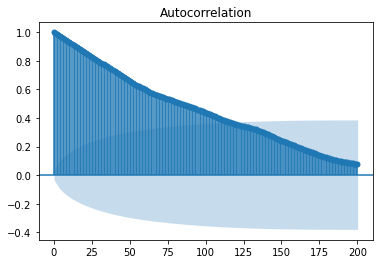

In [19]:
#石油化工自相关性
plot_acf(indexDataPrice.iloc[:,-1],lags=200)
print("石油化工")
plt.show()

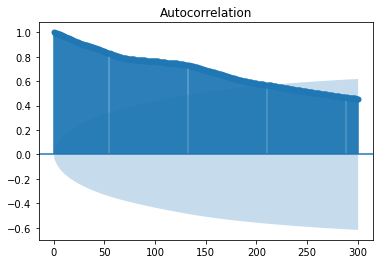

In [20]:
#计算机自相关性
plot_acf(indexDataPrice.iloc[:,3],lags=300)
plt.show()

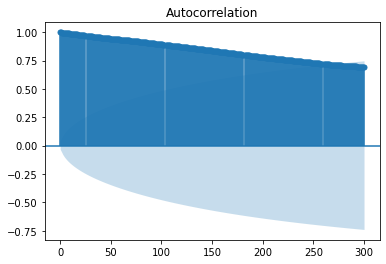

In [21]:
#银行自相关性
plot_acf(indexDataPrice.iloc[:,9],lags=300)
plt.show()

In [22]:
#算出数据对数收益率
logIndexDataPrice=indexDataPrice/indexDataPrice.shift(1)
logIndexDataPrice=logIndexDataPrice.astype(dtype='float')
logIndexDataPrice=logIndexDataPrice.apply(np.log)
logIndexDataPrice

,传媒(中信),综合金融(中信),综合(中信),计算机(中信),通信(中信),电子(中信),交通运输(中信),房地产(中信),非银行金融(中信),银行(中信),...,机械(中信),轻工制造(中信),建材(中信),建筑(中信),基础化工(中信),钢铁(中信),电力及公用事业(中信),有色金属(中信),煤炭(中信),石油石化(中信)
时间,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.020777,0.000000,0.002379,0.020270,0.022789,0.035861,0.013503,-0.021337,0.033410,0.006125,...,0.004599,0.007107,0.005366,0.001545,0.009757,-0.003061,0.005965,0.030222,0.032654,0.015964
2010-01-06,-0.005176,0.000000,-0.009230,0.000596,-0.013379,0.009395,-0.004735,0.001928,-0.014166,-0.016934,...,0.004462,-0.001330,-0.000046,-0.000274,0.000762,0.007261,0.000203,0.002747,0.001958,-0.008760
2010-01-07,-0.013256,0.000000,-0.024961,-0.031893,-0.031556,-0.012525,-0.018277,-0.006492,-0.021067,-0.019785,...,-0.023555,-0.017755,-0.024443,-0.015116,-0.015788,-0.025327,-0.019440,-0.011406,-0.020246,-0.017931
2010-01-08,0.026851,0.000000,0.014296,0.029857,0.013965,0.033997,0.010950,0.014557,0.007592,0.006058,...,0.000893,0.009398,0.008189,0.005449,0.006400,0.001825,0.008453,-0.011178,-0.011886,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09,-0.008035,-0.019579,-0.017141,-0.010081,-0.005537,-0.000962,-0.016457,-0.031385,-0.025614,-0.016928,...,-0.014111,-0.008443,-0.019291,-0.001004,-0.014517,-0.020761,-0.000723,-0.023544,0.021235,-0.028596
2022-03-10,0.007086,0.007155,0.025956,0.004847,0.006712,0.011268,0.015070,0.006885,-0.000557,0.007046,...,0.016791,0.011126,0.028457,0.010306,0.031981,0.016909,0.014713,0.010670,0.002181,0.022493
2022-03-11,0.009554,0.006461,0.003966,0.010086,0.010454,-0.001585,0.013527,0.002234,0.017244,0.005294,...,0.002431,0.004430,-0.005115,-0.016248,0.004525,-0.007406,-0.012457,-0.004669,0.001360,-0.004691


In [23]:
logIndexDataPrice.columns

Index(['传媒(中信)', '综合金融(中信)', '综合(中信)', '计算机(中信)', '通信(中信)', '电子(中信)',
       '交通运输(中信)', '房地产(中信)', '非银行金融(中信)', '银行(中信)', '农林牧渔(中信)', '食品饮料(中信)',
       '医药(中信)', '纺织服装(中信)', '家电(中信)', '消费者服务(中信)', '商贸零售(中信)', '汽车(中信)',
       '国防军工(中信)', '电力设备及新能源(中信)', '机械(中信)', '轻工制造(中信)', '建材(中信)', '建筑(中信)',
       '基础化工(中信)', '钢铁(中信)', '电力及公用事业(中信)', '有色金属(中信)', '煤炭(中信)', '石油石化(中信)'],
      dtype='object')

In [24]:
dataTest=logIndexDataPrice["传媒(中信)"]
dataTest

时间
2010-01-04         NaN
2010-01-05    0.020777
2010-01-06   -0.005176
2010-01-07   -0.013256
2010-01-08    0.026851
                ...   
2022-03-09   -0.008035
2022-03-10    0.007086
2022-03-11    0.009554
2022-03-14   -0.030841
2022-03-15   -0.058902
Name: 传媒(中信), Length: 2963, dtype: float64

传媒(中信)


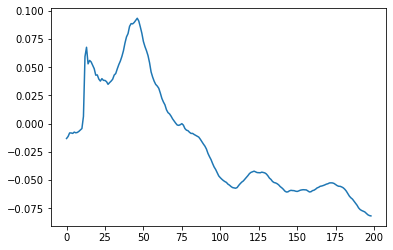

综合金融(中信)


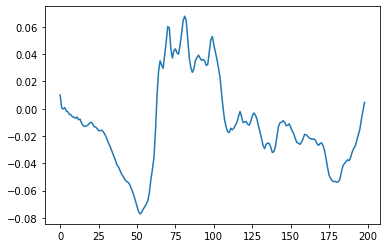

综合(中信)


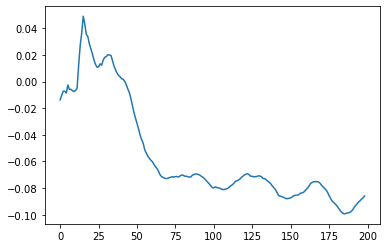

计算机(中信)


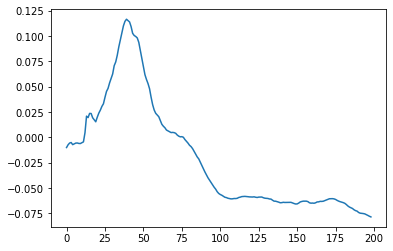

通信(中信)


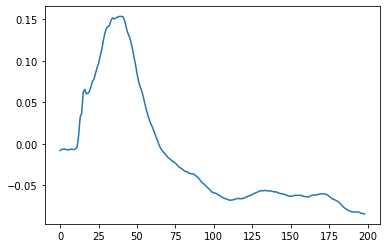

电子(中信)


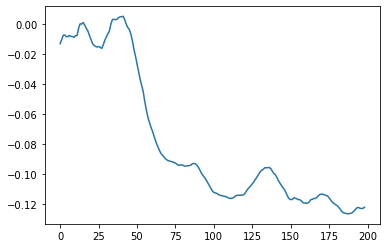

交通运输(中信)


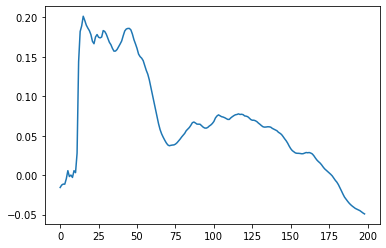

房地产(中信)


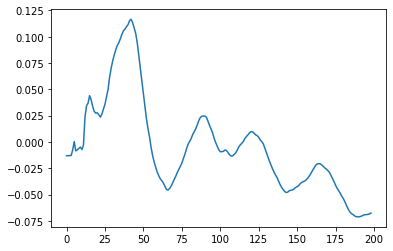

非银行金融(中信)


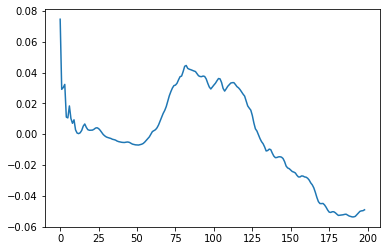

银行(中信)


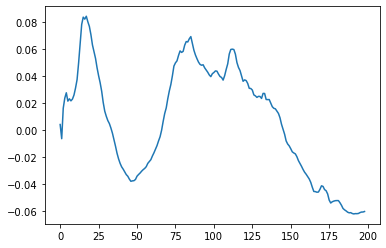

农林牧渔(中信)


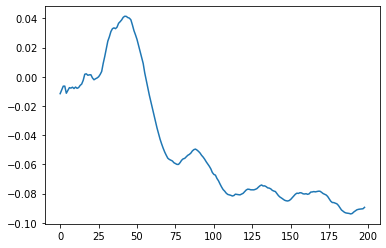

食品饮料(中信)


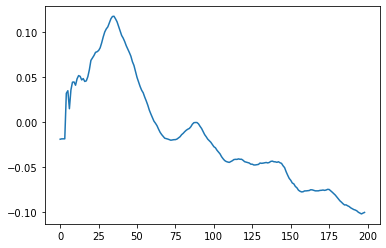

医药(中信)


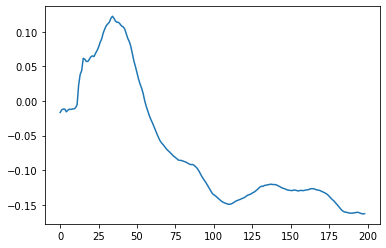

纺织服装(中信)


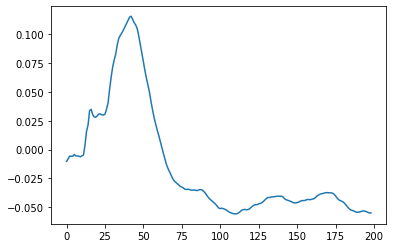

家电(中信)


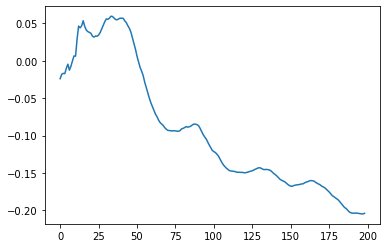

消费者服务(中信)


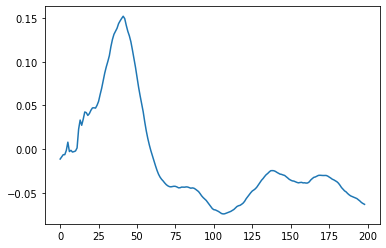

商贸零售(中信)


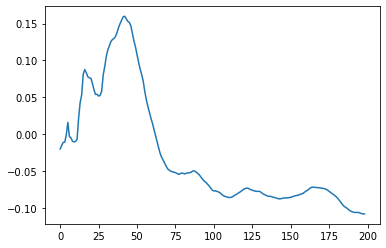

汽车(中信)


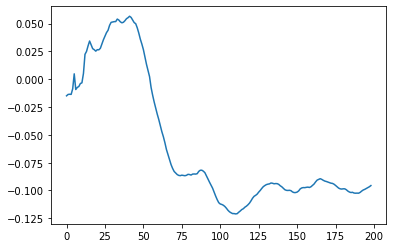

国防军工(中信)


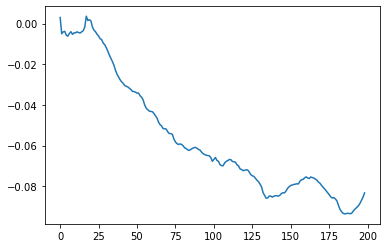

电力设备及新能源(中信)


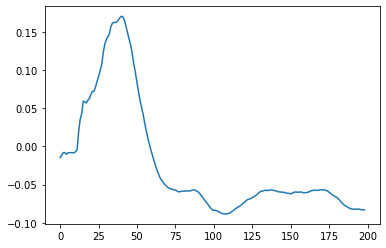

机械(中信)


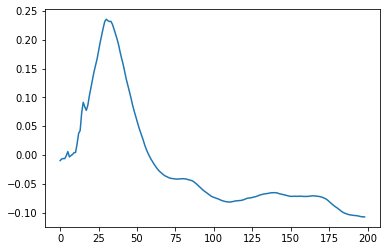

轻工制造(中信)


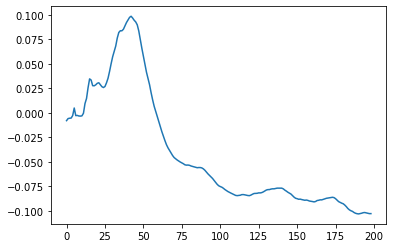

建材(中信)


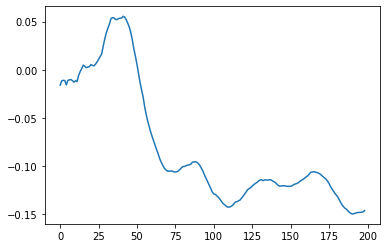

建筑(中信)


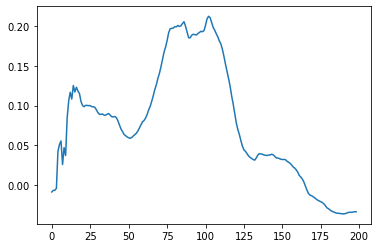

基础化工(中信)


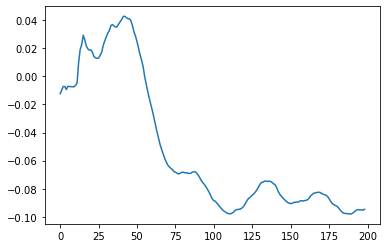

钢铁(中信)


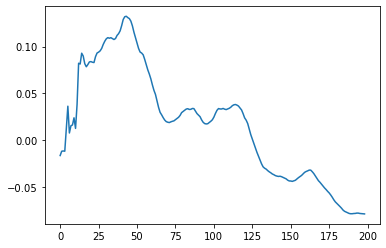

电力及公用事业(中信)


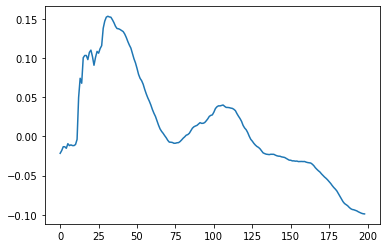

有色金属(中信)


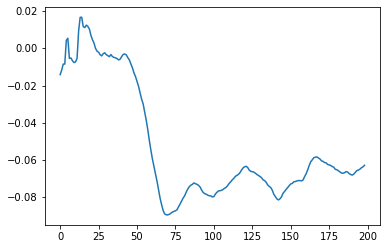

煤炭(中信)


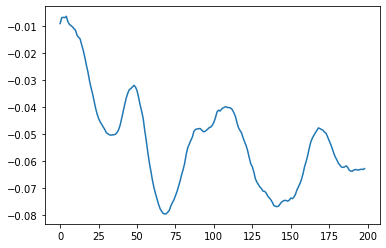

石油石化(中信)


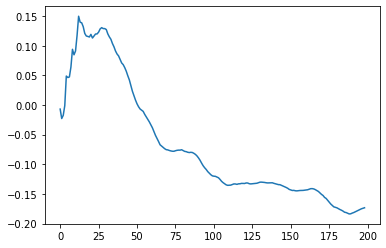

In [26]:
for column in logIndexDataPrice.columns:
    dataTest=logIndexDataPrice[column]
    listCorr=[]
    for i in range(1,200):
        list1=[]
        list2=[]
        for x in range(len(dataTest)-300):
            list1.append(np.exp(dataTest.iloc[x:x+20].mean()*250)-1)
            list2.append(np.exp(dataTest.iloc[x+20:x+20+i].mean()*250)-1)
        listCorr.append(np.corrcoef(list1,list2)[0,1])
    print(column)
    pd.Series(listCorr).plot()
    plt.show()

In [28]:
#持有期20天和观察期20天之间的相关性
listCorr=pd.Series(index=logIndexDataPrice.columns)
for column in logIndexDataPrice.columns:
    dataTest=logIndexDataPrice[column]
    list1=[]
    list2=[]
    for x in range(len(dataTest)-30):
        list1.append(np.exp(dataTest.iloc[x:x+20].mean()*250)-1)
        list2.append(np.exp(dataTest.iloc[x+20:x+20+20].mean()*250)-1)
    listCorr[column]=np.corrcoef(list1,list2)[0,1]
listCorr=listCorr.sort_values()
listCorr

<ipython-input-28-ee20569eb976>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  listCorr=pd.Series(index=logIndexDataPrice.columns)


煤炭(中信)         -0.029914
综合金融(中信)       -0.010556
电子(中信)         -0.004439
国防军工(中信)        0.002633
非银行金融(中信)       0.003059
农林牧渔(中信)        0.003633
建材(中信)          0.007455
有色金属(中信)        0.009306
计算机(中信)         0.018315
基础化工(中信)        0.019790
汽车(中信)          0.028390
纺织服装(中信)        0.029544
综合(中信)          0.029573
轻工制造(中信)        0.030446
房地产(中信)         0.032646
消费者服务(中信)       0.043038
传媒(中信)          0.045816
食品饮料(中信)        0.050828
家电(中信)          0.054558
电力设备及新能源(中信)    0.064042
医药(中信)          0.065391
通信(中信)          0.065533
钢铁(中信)          0.070664
银行(中信)          0.078497
商贸零售(中信)        0.080709
石油石化(中信)        0.084621
电力及公用事业(中信)     0.095321
建筑(中信)          0.104374
机械(中信)          0.104768
交通运输(中信)        0.183059
dtype: float64

In [29]:
listCorr.index.tolist()

['煤炭(中信)',
 '综合金融(中信)',
 '电子(中信)',
 '国防军工(中信)',
 '非银行金融(中信)',
 '农林牧渔(中信)',
 '建材(中信)',
 '有色金属(中信)',
 '计算机(中信)',
 '基础化工(中信)',
 '汽车(中信)',
 '纺织服装(中信)',
 '综合(中信)',
 '轻工制造(中信)',
 '房地产(中信)',
 '消费者服务(中信)',
 '传媒(中信)',
 '食品饮料(中信)',
 '家电(中信)',
 '电力设备及新能源(中信)',
 '医药(中信)',
 '通信(中信)',
 '钢铁(中信)',
 '银行(中信)',
 '商贸零售(中信)',
 '石油石化(中信)',
 '电力及公用事业(中信)',
 '建筑(中信)',
 '机械(中信)',
 '交通运输(中信)']

In [30]:
group1=listCorr.index.tolist()[0:6]
group2=listCorr.index.tolist()[6:12]
group3=listCorr.index.tolist()[12:18]
group4=listCorr.index.tolist()[18:24]
group5=listCorr.index.tolist()[24:30]

In [33]:
groupList=[group1,group2,group3,group4,group5]
groupList

[['煤炭(中信)', '综合金融(中信)', '电子(中信)', '国防军工(中信)', '非银行金融(中信)', '农林牧渔(中信)'],
 ['建材(中信)', '有色金属(中信)', '计算机(中信)', '基础化工(中信)', '汽车(中信)', '纺织服装(中信)'],
 ['综合(中信)', '轻工制造(中信)', '房地产(中信)', '消费者服务(中信)', '传媒(中信)', '食品饮料(中信)'],
 ['家电(中信)', '电力设备及新能源(中信)', '医药(中信)', '通信(中信)', '钢铁(中信)', '银行(中信)'],
 ['商贸零售(中信)', '石油石化(中信)', '电力及公用事业(中信)', '建筑(中信)', '机械(中信)', '交通运输(中信)']]

In [34]:
indexDataPrice.iloc[-1]

传媒(中信)          0.987385
综合金融(中信)        0.442678
综合(中信)          1.359127
计算机(中信)          2.42279
通信(中信)           1.38048
电子(中信)          3.916375
交通运输(中信)        0.909929
房地产(中信)         1.064535
非银行金融(中信)       0.986702
银行(中信)          1.710372
农林牧渔(中信)        1.686248
食品饮料(中信)        4.705639
医药(中信)          2.854345
纺织服装(中信)         0.98268
家电(中信)          2.925145
消费者服务(中信)       3.164964
商贸零售(中信)        0.730521
汽车(中信)          1.903087
国防军工(中信)        1.842091
电力设备及新能源(中信)    2.454764
机械(中信)          1.441601
轻工制造(中信)        1.553347
建材(中信)          1.799995
建筑(中信)          1.178888
基础化工(中信)        2.002278
钢铁(中信)           0.69644
电力及公用事业(中信)     1.158292
有色金属(中信)         1.20248
煤炭(中信)           0.77994
石油石化(中信)         0.92856
Name: 2022-03-15 00:00:00, dtype: object

In [35]:
#不进行换仓,计算第一组到第五组累计收益
reList=[]
for group in groupList:
    reSum=0
    for index in group:
        reSum+=(indexDataPrice.iloc[-1][index]-1)*(1/6)
    reList.append(reSum)
reList   

[0.6090055958443049,
 0.7188851989638412,
 1.139165950945792,
 1.0035907772273431,
 0.057964977594994596]

In [36]:
indexDataPrice

,传媒(中信),综合金融(中信),综合(中信),计算机(中信),通信(中信),电子(中信),交通运输(中信),房地产(中信),非银行金融(中信),银行(中信),...,机械(中信),轻工制造(中信),建材(中信),建筑(中信),基础化工(中信),钢铁(中信),电力及公用事业(中信),有色金属(中信),煤炭(中信),石油石化(中信)
时间,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1.010882,1.0,1.005541,1.022237,1.006334,1.047988,0.995947,0.982932,0.979329,0.980247,...,0.997198,1.000392,0.995715,0.991782,1.009583,0.992546,0.995433,0.997362,0.989537,0.993532
2010-01-05,1.032104,1.0,1.007936,1.043169,1.029531,1.086252,1.009487,0.962181,1.012601,0.98627,...,1.001795,1.007527,1.001072,0.993315,1.019482,0.989513,1.001389,1.027964,1.022383,1.00952
2010-01-06,1.026776,1.0,0.998675,1.043791,1.015849,1.096505,1.004718,0.964038,0.998357,0.969709,...,1.006275,1.006188,1.001026,0.993043,1.020259,0.996723,1.001592,1.030792,1.024387,1.000715
2010-01-07,1.013254,1.0,0.974056,1.011026,0.984293,1.082857,0.986522,0.9578,0.977545,0.950712,...,0.982849,0.988481,0.976854,0.978145,1.004277,0.971796,0.982309,1.019102,1.003856,0.982931
2010-01-08,1.04083,1.0,0.988081,1.041668,0.998135,1.120303,0.997383,0.971844,0.984995,0.956488,...,0.983727,0.997814,0.984887,0.98349,1.010726,0.973572,0.990648,1.007773,0.991994,0.983915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09,1.062269,0.466665,1.427865,2.56085,1.459806,4.178903,0.975679,1.1626,1.034447,1.81701,...,1.529428,1.664589,1.936035,1.284211,2.062364,0.767876,1.272148,1.308137,0.878383,0.98389
2022-03-10,1.069823,0.470016,1.465412,2.573293,1.469637,4.226258,0.990493,1.170632,1.033871,1.829858,...,1.555326,1.683213,1.99192,1.297514,2.129386,0.780971,1.291004,1.322169,0.880301,1.006272
2022-03-11,1.080093,0.473062,1.471236,2.599379,1.485082,4.219564,1.003983,1.17325,1.051854,1.839571,...,1.559111,1.690686,1.981757,1.276602,2.139043,0.775208,1.275021,1.31601,0.881499,1.001562


In [84]:
monthData

,石油石化(中信)CI005001.WI,煤炭(中信)CI005002.WI,有色金属(中信)CI005003.WI,电力及公用事业(中信)CI005004.WI,钢铁(中信)CI005005.WI,基础化工(中信)CI005006.WI,建筑(中信)CI005007.WI,建材(中信)CI005008.WI,轻工制造(中信)CI005009.WI,机械(中信)CI005010.WI,...,农林牧渔(中信)CI005020.WI,银行(中信)CI005021.WI,非银行金融(中信)CI005022.WI,房地产(中信)CI005023.WI,交通运输(中信)CI005024.WI,电子(中信)CI005025.WI,通信(中信)CI005026.WI,计算机(中信)CI005027.WI,传媒(中信)CI005028.WI,综合(中信)CI005029.WI
日期,,,,,,,,,,,,,,,,,,,,,
2005-01-31,-13.9690,-9.5245,-8.0745,-8.8131,-1.5821,-6.3275,-7.1149,-6.6128,-8.3446,-4.8162,...,-8.0687,-1.4896,-15.1644,0.5202,-4.8572,-8.3556,-1.8882,-9.5807,-7.5477,-8.4641
2005-02-28,11.9650,13.0761,14.1099,7.8857,7.4207,10.7023,11.4503,9.9195,6.7891,11.9321,...,10.3889,6.5740,12.2011,7.9023,7.2900,19.4960,7.5152,9.1352,10.5189,8.7571
2005-03-31,-8.2533,-10.7633,-11.1822,-8.8172,-9.7204,-6.8936,-14.6377,-13.8937,-11.7231,-9.9243,...,-11.6173,-8.7225,-18.8932,-12.8411,-2.6963,-14.6794,-16.0760,-15.6435,-13.9923,-15.3942
2005-04-29,-1.9008,1.5134,-1.7263,-0.9859,-10.1365,-0.4672,-6.2489,-10.6926,-3.9307,-2.2792,...,-6.1226,8.8066,7.3853,-4.1588,3.0122,-12.0486,-9.6441,-12.9527,-12.6376,-9.1439
2005-05-31,-10.7732,-13.2142,-9.9106,-6.3934,-4.8186,-11.0753,-3.7497,-3.2051,-3.6816,-8.8559,...,-5.1731,-5.7882,-5.4555,-8.3962,-10.6592,-2.0689,-3.2934,-0.2249,-1.6234,-3.1886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-29,-0.8013,-1.3948,1.4402,-1.9450,1.1952,-0.8704,-2.0505,5.1560,-0.5028,-1.3650,...,-9.8556,-1.2780,-3.7191,-1.1843,-2.4934,3.0385,-1.7058,-2.8458,0.4009,-5.6125
2019-12-31,4.8211,5.8974,15.0904,2.4374,5.5586,10.2638,5.5741,14.7197,8.8665,9.4927,...,1.5902,4.0152,10.0953,10.5905,6.3202,11.4052,7.3271,7.7489,12.9765,10.1257
2020-01-23,-2.5969,-6.0910,-2.3794,-3.0434,-6.0591,-0.3804,-2.9665,-6.3538,0.8223,-0.7995,...,-4.4567,-4.5914,-4.1030,-6.5664,-6.3940,14.5651,3.6997,6.4790,4.0343,-0.6920


In [58]:
groupDf=pd.DataFrame(index=monthData.index,columns=['group1','group2','group3','group4','group5'])
groupDf=groupDf.reset_index()
groupDf.iloc[0,1:]=1
groupDf

,日期,group1,group2,group3,group4,group5
0,2005-01-31,1,1,1,1,1
1,2005-02-28,NaN,NaN,NaN,NaN,NaN
2,2005-03-31,NaN,NaN,NaN,NaN,NaN
3,2005-04-29,NaN,NaN,NaN,NaN,NaN
4,2005-05-31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
178,2019-11-29,NaN,NaN,NaN,NaN,NaN
179,2019-12-31,NaN,NaN,NaN,NaN,NaN
180,2020-01-23,NaN,NaN,NaN,NaN,NaN
181,2020-02-28,NaN,NaN,NaN,NaN,NaN


In [88]:
groupDf0=pd.DataFrame(index=monthData.index,columns=['group1','group2','group3','group4','group5'])
# groupDf0=groupDf.reset_index()
groupDf0

,group1,group2,group3,group4,group5
日期,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN
2005-02-28,NaN,NaN,NaN,NaN,NaN
2005-03-31,NaN,NaN,NaN,NaN,NaN
2005-04-29,NaN,NaN,NaN,NaN,NaN
2005-05-31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-11-29,NaN,NaN,NaN,NaN,NaN
2019-12-31,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN


In [89]:
for index,row in monthData.iterrows():    
    groupDf0.loc[index,"group1"]=row.sort_values().index.tolist()[0:6]
    groupDf0.loc[index,"group2"]=row.sort_values().index.tolist()[6:12]
    groupDf0.loc[index,"group3"]=row.sort_values().index.tolist()[12:17]
    groupDf0.loc[index,"group4"]=row.sort_values().index.tolist()[17:23]
    groupDf0.loc[index,"group5"]=row.sort_values().index.tolist()[23:30] 
groupDf0=groupDf0.reset_index()
groupDf0

,日期,group1,group2,group3,group4,group5
0,2005-01-31,"[非银行金融(中信)CI005022.WI, 石油石化(中信)CI005001.WI, 电力...","[电力及公用事业(中信)CI005004.WI, 纺织服装(中信)CI005017.WI, ...","[农林牧渔(中信)CI005020.WI, 传媒(中信)CI005028.WI, 建筑(中信...","[基础化工(中信)CI005006.WI, 消费者服务(中信)CI005015.WI, 家电...","[商贸零售(中信)CI005014.WI, 食品饮料(中信)CI005019.WI, 通信(..."
1,2005-02-28,"[银行(中信)CI005021.WI, 轻工制造(中信)CI005009.WI, 交通运输(...","[电力及公用事业(中信)CI005004.WI, 房地产(中信)CI005023.WI, 食...","[家电(中信)CI005016.WI, 建材(中信)CI005008.WI, 农林牧渔(中信...","[消费者服务(中信)CI005015.WI, 建筑(中信)CI005007.WI, 纺织服装...","[非银行金融(中信)CI005022.WI, 国防军工(中信)CI005012.WI, 煤炭..."
2,2005-03-31,"[非银行金融(中信)CI005022.WI, 通信(中信)CI005026.WI, 计算机(...","[建筑(中信)CI005007.WI, 汽车(中信)CI005013.WI, 纺织服装(中信...","[房地产(中信)CI005023.WI, 轻工制造(中信)CI005009.WI, 农林牧渔...","[商贸零售(中信)CI005014.WI, 消费者服务(中信)CI005015.WI, 机械...","[医药(中信)CI005018.WI, 石油石化(中信)CI005001.WI, 基础化工(..."
3,2005-04-29,"[计算机(中信)CI005027.WI, 传媒(中信)CI005028.WI, 电子(中信)...","[综合(中信)CI005029.WI, 电力设备及新能源(中信)CI005011.WI, 纺...","[汽车(中信)CI005013.WI, 房地产(中信)CI005023.WI, 轻工制造(中...","[石油石化(中信)CI005001.WI, 家电(中信)CI005016.WI, 有色金属(...","[医药(中信)CI005018.WI, 煤炭(中信)CI005002.WI, 交通运输(中信..."
4,2005-05-31,"[煤炭(中信)CI005002.WI, 基础化工(中信)CI005006.WI, 石油石化(...","[房地产(中信)CI005023.WI, 食品饮料(中信)CI005019.WI, 国防军工...","[银行(中信)CI005021.WI, 非银行金融(中信)CI005022.WI, 农林牧渔...","[商贸零售(中信)CI005014.WI, 建筑(中信)CI005007.WI, 轻工制造(...","[家电(中信)CI005016.WI, 消费者服务(中信)CI005015.WI, 汽车(中..."
...,...,...,...,...,...,...
178,2019-11-29,"[农林牧渔(中信)CI005020.WI, 综合(中信)CI005029.WI, 纺织服装(...","[医药(中信)CI005018.WI, 计算机(中信)CI005027.WI, 食品饮料(中...","[国防军工(中信)CI005012.WI, 通信(中信)CI005026.WI, 煤炭(中信...","[房地产(中信)CI005023.WI, 家电(中信)CI005016.WI, 基础化工(中...","[传媒(中信)CI005028.WI, 钢铁(中信)CI005005.WI, 有色金属(中信..."
179,2019-12-31,"[农林牧渔(中信)CI005020.WI, 电力及公用事业(中信)CI005004.WI, ...","[商贸零售(中信)CI005014.WI, 钢铁(中信)CI005005.WI, 建筑(中信...","[消费者服务(中信)CI005015.WI, 通信(中信)CI005026.WI, 电力设备...","[轻工制造(中信)CI005009.WI, 汽车(中信)CI005013.WI, 机械(中信...","[房地产(中信)CI005023.WI, 家电(中信)CI005016.WI, 电子(中信)..."
180,2020-01-23,"[消费者服务(中信)CI005015.WI, 房地产(中信)CI005023.WI, 交通运...","[食品饮料(中信)CI005019.WI, 银行(中信)CI005021.WI, 农林牧渔(...","[石油石化(中信)CI005001.WI, 商贸零售(中信)CI005014.WI, 家电(...","[机械(中信)CI005010.WI, 综合(中信)CI005029.WI, 基础化工(中信...","[传媒(中信)CI005028.WI, 国防军工(中信)CI005012.WI, 医药(中信..."
181,2020-02-28,"[石油石化(中信)CI005001.WI, 银行(中信)CI005021.WI, 煤炭(中信...","[商贸零售(中信)CI005014.WI, 家电(中信)CI005016.WI, 电力及公用...","[房地产(中信)CI005023.WI, 建筑(中信)CI005007.WI, 传媒(中信)...","[电力设备及新能源(中信)CI005011.WI, 消费者服务(中信)CI005015.WI...","[综合(中信)CI005029.WI, 电子(中信)CI005025.WI, 建材(中信)C..."


In [90]:
monthDataRe=monthData.reset_index()
monthDataRe

,日期,石油石化(中信)CI005001.WI,煤炭(中信)CI005002.WI,有色金属(中信)CI005003.WI,电力及公用事业(中信)CI005004.WI,钢铁(中信)CI005005.WI,基础化工(中信)CI005006.WI,建筑(中信)CI005007.WI,建材(中信)CI005008.WI,轻工制造(中信)CI005009.WI,...,农林牧渔(中信)CI005020.WI,银行(中信)CI005021.WI,非银行金融(中信)CI005022.WI,房地产(中信)CI005023.WI,交通运输(中信)CI005024.WI,电子(中信)CI005025.WI,通信(中信)CI005026.WI,计算机(中信)CI005027.WI,传媒(中信)CI005028.WI,综合(中信)CI005029.WI
0,2005-01-31,-13.9690,-9.5245,-8.0745,-8.8131,-1.5821,-6.3275,-7.1149,-6.6128,-8.3446,...,-8.0687,-1.4896,-15.1644,0.5202,-4.8572,-8.3556,-1.8882,-9.5807,-7.5477,-8.4641
1,2005-02-28,11.9650,13.0761,14.1099,7.8857,7.4207,10.7023,11.4503,9.9195,6.7891,...,10.3889,6.5740,12.2011,7.9023,7.2900,19.4960,7.5152,9.1352,10.5189,8.7571
2,2005-03-31,-8.2533,-10.7633,-11.1822,-8.8172,-9.7204,-6.8936,-14.6377,-13.8937,-11.7231,...,-11.6173,-8.7225,-18.8932,-12.8411,-2.6963,-14.6794,-16.0760,-15.6435,-13.9923,-15.3942
3,2005-04-29,-1.9008,1.5134,-1.7263,-0.9859,-10.1365,-0.4672,-6.2489,-10.6926,-3.9307,...,-6.1226,8.8066,7.3853,-4.1588,3.0122,-12.0486,-9.6441,-12.9527,-12.6376,-9.1439
4,2005-05-31,-10.7732,-13.2142,-9.9106,-6.3934,-4.8186,-11.0753,-3.7497,-3.2051,-3.6816,...,-5.1731,-5.7882,-5.4555,-8.3962,-10.6592,-2.0689,-3.2934,-0.2249,-1.6234,-3.1886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2019-11-29,-0.8013,-1.3948,1.4402,-1.9450,1.1952,-0.8704,-2.0505,5.1560,-0.5028,...,-9.8556,-1.2780,-3.7191,-1.1843,-2.4934,3.0385,-1.7058,-2.8458,0.4009,-5.6125
179,2019-12-31,4.8211,5.8974,15.0904,2.4374,5.5586,10.2638,5.5741,14.7197,8.8665,...,1.5902,4.0152,10.0953,10.5905,6.3202,11.4052,7.3271,7.7489,12.9765,10.1257
180,2020-01-23,-2.5969,-6.0910,-2.3794,-3.0434,-6.0591,-0.3804,-2.9665,-6.3538,0.8223,...,-4.4567,-4.5914,-4.1030,-6.5664,-6.3940,14.5651,3.6997,6.4790,4.0343,-0.6920
181,2020-02-28,-6.8234,-5.7328,-2.7739,-2.8074,-5.0602,0.7323,-1.3431,6.8097,-2.6294,...,9.2034,-5.8575,-4.2575,-2.1461,-5.5434,4.6094,9.0108,10.0326,-0.2607,3.8201


In [91]:
monthDataRe.loc[1+1,'非银行金融(中信)CI005022.WI']

-18.8932

In [92]:
g1=1
g2=1
g3=1
g4=1
g5=1
for index,row in groupDf0.iterrows():
#     print(index)
#     print(row)
#     print(row.group5)
    array1=np.array([g1/6,g1/6,g1/6,g1/6,g1/6,g1/6])
    array2=np.array([g2/6,g2/6,g2/6,g2/6,g2/6,g2/6])
    array3=np.array([g3/5,g3/5,g3/5,g3/5,g3/5])
    array4=np.array([g4/6,g4/6,g4/6,g4/6,g4/6,g4/6])
    array5=np.array([g5/6,g5/6,g5/6,g5/6,g5/6,g5/6])
    
    print(monthDataRe.loc[index+1,row.group1]/100+1)
    groupDf.loc[index+1,"group1"]=np.sum((monthDataRe.loc[index+1,row.group1]/100+1).values*array1)
    groupDf.loc[index+1,"group2"]=np.sum((monthDataRe.loc[index+1,row.group2]/100+1).values*array2)
    groupDf.loc[index+1,"group3"]=np.sum((monthDataRe.loc[index+1,row.group3]/100+1).values*array3)
    groupDf.loc[index+1,"group4"]=np.sum((monthDataRe.loc[index+1,row.group4]/100+1).values*array4)
    groupDf.loc[index+1,"group5"]=np.sum((monthDataRe.loc[index+1,row.group5]/100+1).values*array5)
    
    g1=groupDf.loc[index+1,"group1"]
    g2=groupDf.loc[index+1,"group2"]
    g3=groupDf.loc[index+1,"group3"]
    g4=groupDf.loc[index+1,"group4"]
    g5=groupDf.loc[index+1,"group5"]
        

0
日期                                      2005-01-31 00:00:00
group1    [非银行金融(中信)CI005022.WI, 石油石化(中信)CI005001.WI, 电力...
group2    [电力及公用事业(中信)CI005004.WI, 纺织服装(中信)CI005017.WI, ...
group3    [农林牧渔(中信)CI005020.WI, 传媒(中信)CI005028.WI, 建筑(中信...
group4    [基础化工(中信)CI005006.WI, 消费者服务(中信)CI005015.WI, 家电...
group5    [商贸零售(中信)CI005014.WI, 食品饮料(中信)CI005019.WI, 通信(...
Name: 0, dtype: object
['商贸零售(中信)CI005014.WI', '食品饮料(中信)CI005019.WI', '通信(中信)CI005026.WI', '钢铁(中信)CI005005.WI', '银行(中信)CI005021.WI', '房地产(中信)CI005023.WI']
非银行金融(中信)CI005022.WI       1.122011
石油石化(中信)CI005001.WI         1.11965
电力设备及新能源(中信)CI005011.WI    1.133265
国防军工(中信)CI005012.WI        1.129092
计算机(中信)CI005027.WI         1.091352
煤炭(中信)CI005002.WI          1.130761
Name: 1, dtype: object
1
日期                                      2005-02-28 00:00:00
group1    [银行(中信)CI005021.WI, 轻工制造(中信)CI005009.WI, 交通运输(...
group2    [电力及公用事业(中信)CI005004.WI, 房地产(中信)CI005023.WI, 食...
group3    [家电(中信)CI005016.WI, 建材(中信)CI005008.WI, 农林牧渔(中信...
gr

KeyError: 183

In [93]:
#每日价格表
groupDf

,日期,group1,group2,group3,group4,group5
0,2005-01-31,1,1,1,1,1
1,2005-02-28,1.121022,1.114201,1.100096,1.103411,1.077802
2,2005-03-31,1.014046,0.99036,0.968476,0.97203,0.938362
3,2005-04-29,0.93862,0.917176,0.940535,0.951025,0.943523
4,2005-05-31,0.914788,0.876912,0.888121,0.874616,0.865357
...,...,...,...,...,...,...
178,2019-11-29,2.991233,5.292506,5.868297,4.418725,11.987734
179,2019-12-31,3.202948,5.563349,6.250196,4.808199,13.364635
180,2020-01-23,3.119748,5.379875,6.340063,4.778262,13.382407
181,2020-02-28,3.066672,5.314375,6.147202,4.892495,13.84477


<AxesSubplot:xlabel='日期'>

/Users/zhououyang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhououyang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhououyang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/zhououyang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


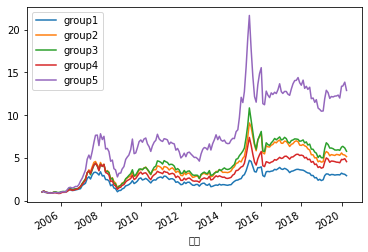

In [101]:
#分组后累计收益图
resultDf=groupDf.set_index('日期')
resultDf.plot()

In [110]:
#对数收益率
logGroup=resultDf/resultDf.shift(1)
logGroup=logGroup.astype(dtype="float")
logGroup=np.log(logGroup)
logGroup

,group1,group2,group3,group4,group5
日期,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN
2005-02-28,0.114241,0.108137,0.095398,0.098406,0.074923
2005-03-31,-0.100293,-0.117824,-0.127430,-0.126775,-0.138542
2005-04-29,-0.077293,-0.076769,-0.029274,-0.021847,0.005485
2005-05-31,-0.025718,-0.044893,-0.057341,-0.083755,-0.086479
...,...,...,...,...,...
2019-11-29,-0.010134,-0.012925,-0.011427,-0.012467,-0.028275
2019-12-31,0.068386,0.049908,0.063048,0.084472,0.108728
2020-01-23,-0.026319,-0.033535,0.014276,-0.006246,0.001329


In [115]:
#分组后年化收益
np.exp(logGroup.mean()*12)-1

group1    0.072917
group2    0.113928
group3    0.122362
group4    0.105084
group5    0.183511
dtype: float64

In [116]:
#分组后年化波动
np.sqrt(logGroup.var()*12)

group1    0.307063
group2    0.317031
group3    0.335255
group4    0.323604
group5    0.342475
dtype: float64

In [117]:
#分组后夏普比率
(np.exp(logGroup.mean()*12)-1)/np.sqrt(logGroup.var()*12)

group1    0.237466
group2    0.359357
group3    0.364981
group4    0.324731
group5    0.535838
dtype: float64

In [118]:
#分组后最大回撤
resultDf.apply(maxDown).max()

group1    0.695253
group2    0.670729
group3    0.683094
group4    0.699914
group5    0.646059
dtype: float64

In [122]:
#动量指标设计
#利用夏普比率来设计持仓
#不同观察期,持有仍然是一个月
log

,石油石化(中信)CI005001.WI,煤炭(中信)CI005002.WI,有色金属(中信)CI005003.WI,电力及公用事业(中信)CI005004.WI,钢铁(中信)CI005005.WI,基础化工(中信)CI005006.WI,建筑(中信)CI005007.WI,建材(中信)CI005008.WI,轻工制造(中信)CI005009.WI,机械(中信)CI005010.WI,...,农林牧渔(中信)CI005020.WI,银行(中信)CI005021.WI,非银行金融(中信)CI005022.WI,房地产(中信)CI005023.WI,交通运输(中信)CI005024.WI,电子(中信)CI005025.WI,通信(中信)CI005026.WI,计算机(中信)CI005027.WI,传媒(中信)CI005028.WI,综合(中信)CI005029.WI
日期,,,,,,,,,,,,,,,,,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,0.113016,0.122891,0.131992,0.075902,0.071583,0.101674,0.108409,0.094578,0.065686,0.112722,...,0.098839,0.063669,0.115123,0.076056,0.070365,0.178113,0.072462,0.087417,0.100016,0.083947
2005-03-31,-0.086139,-0.113878,-0.118583,-0.092304,-0.102259,-0.071427,-0.158266,-0.149588,-0.124692,-0.104520,...,-0.123494,-0.091266,-0.209403,-0.137437,-0.027333,-0.158754,-0.175259,-0.170118,-0.150733,-0.167167
2005-04-29,-0.019191,0.015021,-0.017414,-0.009908,-0.106878,-0.004683,-0.064527,-0.113086,-0.040100,-0.023056,...,-0.063181,0.084402,0.071253,-0.042478,0.029677,-0.128386,-0.101414,-0.138719,-0.135105,-0.095893
2005-05-31,-0.113989,-0.141727,-0.104368,-0.066069,-0.049386,-0.117380,-0.038218,-0.032576,-0.037511,-0.092728,...,-0.053117,-0.059625,-0.056100,-0.087697,-0.112712,-0.020906,-0.033489,-0.002252,-0.016367,-0.032405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-29,-0.008045,-0.014046,0.014299,-0.019642,0.011881,-0.008742,-0.020718,0.050275,-0.005041,-0.013744,...,-0.103757,-0.012862,-0.037900,-0.011914,-0.025250,0.029933,-0.017205,-0.028871,0.004001,-0.057762
2019-12-31,0.047085,0.057301,0.140548,0.024082,0.054096,0.097705,0.054243,0.137322,0.084952,0.090688,...,0.015777,0.039367,0.096176,0.100664,0.061285,0.108004,0.070711,0.074633,0.122010,0.096452
2020-01-23,-0.026312,-0.062844,-0.024082,-0.030907,-0.062504,-0.003811,-0.030114,-0.065646,0.008189,-0.008027,...,-0.045591,-0.047001,-0.041895,-0.067919,-0.066076,0.135973,0.036329,0.062778,0.039550,-0.006944


In [140]:
monthData2=log+log.shift(1)
monthData2=monthData2.reset_index()
monthData2=monthData2.iloc[:,1:]
monthData2

,石油石化(中信)CI005001.WI,煤炭(中信)CI005002.WI,有色金属(中信)CI005003.WI,电力及公用事业(中信)CI005004.WI,钢铁(中信)CI005005.WI,基础化工(中信)CI005006.WI,建筑(中信)CI005007.WI,建材(中信)CI005008.WI,轻工制造(中信)CI005009.WI,机械(中信)CI005010.WI,...,农林牧渔(中信)CI005020.WI,银行(中信)CI005021.WI,非银行金融(中信)CI005022.WI,房地产(中信)CI005023.WI,交通运输(中信)CI005024.WI,电子(中信)CI005025.WI,通信(中信)CI005026.WI,计算机(中信)CI005027.WI,传媒(中信)CI005028.WI,综合(中信)CI005029.WI
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.026877,0.009013,0.013409,-0.016402,-0.030676,0.030247,-0.049857,-0.055010,-0.059006,0.008202,...,-0.024655,-0.027596,-0.094281,-0.061381,0.043032,0.019358,-0.102797,-0.082701,-0.050717,-0.083221
3,-0.105330,-0.098857,-0.135997,-0.102212,-0.209137,-0.076110,-0.222792,-0.262673,-0.164792,-0.127576,...,-0.186674,-0.006864,-0.138150,-0.179915,0.002344,-0.287140,-0.276672,-0.308837,-0.285839,-0.263061
4,-0.133180,-0.126707,-0.121781,-0.075977,-0.156264,-0.122063,-0.102745,-0.145662,-0.077611,-0.115784,...,-0.116298,0.024777,0.015154,-0.130175,-0.083035,-0.149292,-0.134902,-0.140970,-0.151472,-0.128299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,-0.010550,-0.040111,-0.034087,-0.020708,-0.012785,-0.020970,-0.045565,0.058090,0.027656,-0.040405,...,0.016949,0.029127,-0.041947,0.007754,-0.032892,0.028395,-0.023009,-0.020076,0.012349,-0.042522
179,0.039040,0.043254,0.154847,0.004440,0.065977,0.088963,0.033525,0.187596,0.079911,0.076944,...,-0.087980,0.026504,0.058276,0.088750,0.036035,0.137936,0.053506,0.045763,0.126011,0.038691
180,0.020773,-0.005543,0.116466,-0.006825,-0.008408,0.093894,0.024129,0.071675,0.093142,0.082661,...,-0.029814,-0.007635,0.054281,0.032745,-0.004791,0.243977,0.107040,0.137411,0.161560,0.089508
181,-0.096986,-0.121881,-0.052213,-0.059382,-0.114432,0.003485,-0.043636,0.000232,-0.018456,0.001348,...,0.042451,-0.107362,-0.085403,-0.089614,-0.123105,0.181036,0.122606,0.158384,0.036940,0.030545


In [153]:
groupDf2=pd.DataFrame(index=monthData2.index,columns=['group5'])
# groupDf2=groupDf2.reset_index()
groupDf2.iloc[[0,1,2],:]=1
groupDf2

,group5
0,1
1,1
2,1
3,NaN
4,NaN
...,...
178,NaN
179,NaN
180,NaN
181,NaN


In [154]:
groupDf20=pd.DataFrame(index=monthData2.index,columns=['group5'])
# groupDf0=groupDf.reset_index()
groupDf20

,group5
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
178,NaN
179,NaN
180,NaN
181,NaN


In [155]:
for index,row in monthData2.iterrows():    
#     print(index)
    groupDf20.loc[index,"group5"]=row.sort_values().index.tolist()[23:]
groupDf20  

,group5
0,"[交通运输(中信)CI005024.WI, 电子(中信)CI005025.WI, 通信(中信..."
1,"[交通运输(中信)CI005024.WI, 电子(中信)CI005025.WI, 通信(中信..."
2,"[电子(中信)CI005025.WI, 石油石化(中信)CI005001.WI, 基础化工(..."
3,"[医药(中信)CI005018.WI, 国防军工(中信)CI005012.WI, 基础化工(..."
4,"[汽车(中信)CI005013.WI, 医药(中信)CI005018.WI, 家电(中信)C..."
...,...
178,"[轻工制造(中信)CI005009.WI, 电子(中信)CI005025.WI, 汽车(中信..."
179,"[家电(中信)CI005016.WI, 传媒(中信)CI005028.WI, 汽车(中信)C..."
180,"[通信(中信)CI005026.WI, 有色金属(中信)CI005003.WI, 电力设备及..."
181,"[电力设备及新能源(中信)CI005011.WI, 医药(中信)CI005018.WI, 国..."


In [199]:
g5=1
for index,row in groupDf20[2:].iterrows():
    if index==182:
        break
    array5=np.array([g5/6,g5/6,g5/6,g5/6,g5/6,g5/6])
#     groupDf2
    groupDf2.loc[index+1,"group5"]=np.sum((monthDataRe.loc[index+1,row.group5]/100+1).values*array5)
    g5=groupDf.loc[index+1,"group5"]   

In [200]:
groupDf2

,group5
0,1
1,1
2,1
3,0.985044
4,0.866294
...,...
178,12.242895
179,13.162432
180,13.560228
181,13.867297


In [201]:
def act(resultDf):
    logGroup=resultDf/resultDf.shift(1)
    logGroup=logGroup.astype(dtype="float")
    logGroup=logGroup.apply(np.log)
    return np.exp(logGroup.mean()*12)-1,np.sqrt(logGroup.var()*12),resultDf.apply(maxDown).max()
reYear,var,maxDown_=act(groupDf2)
print("2月观察期年化收益",reYear.values)
print("2月观察年化波动率",var.values)
print("2月观察期最大回撤",maxDown_.values)
print("2月观察期夏普比率",reYear.values/var.values)

2月观察期年化收益 [0.18086942]
2月观察年化波动率 [0.373664]
2月观察期最大回撤 [0.64277197]
2月观察期夏普比率 [0.48404293]


In [296]:
#截面加时序
groupDf_=pd.DataFrame(index=monthData.index,columns=['group5'])
groupDf_=groupDf_.reset_index()
groupDf_.iloc[0,1:]=1
print(groupDf_)
groupDf_0=pd.DataFrame(index=monthData.index,columns=['group5'])

for index,row in monthData.iterrows():    
    groupDf_0.loc[index,"group5"]=row.sort_values().index.tolist()[23:] 
groupDf_0=groupDf_0.reset_index()
print(groupDf_0)
print(monthDataRe)
g5=1
codi=True
for index,row in groupDf_0.iterrows():
    if index==182:
        break
    array5=np.array([g5/6,g5/6,g5/6,g5/6,g5/6,g5/6])
#     print(array5)
#     print((monthDataRe.loc[index+1,row.group5]/100+1))
    if (monthDataRe.loc[index,row.group5]>0).all():
        g5=np.sum((monthDataRe.loc[index+1,row.group5]/100+1).values*array5)
        groupDf_.loc[index+1,"group5"]=g5
    else:
        groupDf_.loc[index+1,"group5"]=g5
groupDf_

            日期 group5
0   2005-01-31      1
1   2005-02-28    NaN
2   2005-03-31    NaN
3   2005-04-29    NaN
4   2005-05-31    NaN
..         ...    ...
178 2019-11-29    NaN
179 2019-12-31    NaN
180 2020-01-23    NaN
181 2020-02-28    NaN
182 2020-03-31    NaN

[183 rows x 2 columns]
            日期                                             group5
0   2005-01-31  [商贸零售(中信)CI005014.WI, 食品饮料(中信)CI005019.WI, 通信(...
1   2005-02-28  [非银行金融(中信)CI005022.WI, 国防军工(中信)CI005012.WI, 煤炭...
2   2005-03-31  [医药(中信)CI005018.WI, 石油石化(中信)CI005001.WI, 基础化工(...
3   2005-04-29  [医药(中信)CI005018.WI, 煤炭(中信)CI005002.WI, 交通运输(中信...
4   2005-05-31  [家电(中信)CI005016.WI, 消费者服务(中信)CI005015.WI, 汽车(中...
..         ...                                                ...
178 2019-11-29  [传媒(中信)CI005028.WI, 钢铁(中信)CI005005.WI, 有色金属(中信...
179 2019-12-31  [房地产(中信)CI005023.WI, 家电(中信)CI005016.WI, 电子(中信)...
180 2020-01-23  [传媒(中信)CI005028.WI, 国防军工(中信)CI005012.WI, 医药(中信...
181 2020-02-28  [综合(中信)CI005029.WI, 电子(中信)CI005025.W

,日期,group5
0,2005-01-31,1
1,2005-02-28,1
2,2005-03-31,0.870626
3,2005-04-29,0.870626
4,2005-05-31,0.798499
...,...,...
178,2019-11-29,6.721213
179,2019-12-31,7.493206
180,2020-01-23,7.503171
181,2020-02-28,7.762406


<AxesSubplot:>

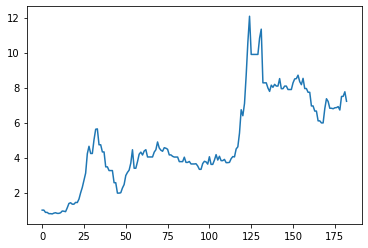

In [297]:
groupDf_["group5"].plot()

In [298]:
reYear,var,maxDown_=act(groupDf_.iloc[:,[1]])
print("引入时序年化收益",reYear.values)
print("引入时序年化波动率",var.values)
print("引入时序最大回撤",maxDown_.values)
print("引入时序夏普比率",reYear.values/var.values)
print("引入时序累计收益",groupDf_.iloc[-1,-1]-1)

引入时序年化收益 [0.13920989]
引入时序年化波动率 [0.30403421]
引入时序最大回撤 [0.6503212]
引入时序夏普比率 [0.45787576]
引入时序累计收益 6.219218241722734


In [299]:
#引入止损机制
groupDf_=pd.DataFrame(index=monthData.index,columns=['group5'])
groupDf_=groupDf_.reset_index()
groupDf_.iloc[0,1:]=1
groupDf_0=pd.DataFrame(index=monthData.index,columns=['group5'])
for index,row in monthData.iterrows():    
    groupDf_0.loc[index,"group5"]=row.sort_values().index.tolist()[23:] 
groupDf_0=groupDf_0.reset_index()
# print(groupDf_0)
g5=1
codi=True
for index,row in groupDf_0.iterrows():
    if index==182:
        break
    array5=np.array([g5/6,g5/6,g5/6,g5/6,g5/6,g5/6])
    if codi:
        
        value0=np.sum((monthDataRe.loc[index+1,row.group5]/100+1).values*array5)
        groupDf_.loc[index+1,"group5"]=value0
        g5=value0
        
        if np.sum(monthDataRe.loc[index+1,row.group5]/100)/6<-0.1:
            codi=False
    else:
        groupDf_.loc[index+1,"group5"]=g5
        if np.sum(monthDataRe.loc[index+1,row.group5]/100)/6>-0.1:
            codi=True
groupDf_

,日期,group5
0,2005-01-31,1
1,2005-02-28,1.077802
2,2005-03-31,0.938362
3,2005-04-29,0.938362
4,2005-05-31,0.860623
...,...,...
178,2019-11-29,10.60068
179,2019-12-31,11.818266
180,2020-01-23,11.833982
181,2020-02-28,12.242846


In [300]:
reYear,var,maxDown_=act(groupDf_.iloc[:,[1]])
print("引入止损年化收益",reYear.values)
print("引入止损年化波动率",var.values)
print("引入止损最大回撤",maxDown_.values)
print("引入止损夏普比率",reYear.values/var.values)
print("引入止损累计收益",groupDf_.iloc[-1,-1]-1)

引入止损年化收益 [0.17395427]
引入止损年化波动率 [0.3276669]
引入止损最大回撤 [0.70479346]
引入止损夏普比率 [0.53088752]
引入止损累计收益 10.38613243874418


<AxesSubplot:>

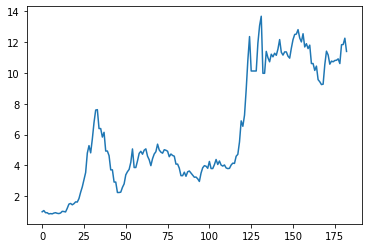

In [301]:
groupDf_["group5"].plot()

In [302]:
#引入止损机制和时序动量
groupDf_=pd.DataFrame(index=monthData.index,columns=['group5'])
groupDf_=groupDf_.reset_index()
groupDf_.iloc[0,1:]=1
groupDf_0=pd.DataFrame(index=monthData.index,columns=['group5'])
for index,row in monthData.iterrows():    
    groupDf_0.loc[index,"group5"]=row.sort_values().index.tolist()[23:] 
groupDf_0=groupDf_0.reset_index()
# print(groupDf_0)
g5=1
codi=True
for index,row in groupDf_0.iterrows():
    if index==182:
        break
    array5=np.array([g5/6,g5/6,g5/6,g5/6,g5/6,g5/6])
    if codi:
        
        value0=np.sum((monthDataRe.loc[index+1,row.group5]/100+1).values*array5)
        groupDf_.loc[index+1,"group5"]=value0
        g5=value0
        if np.sum(monthDataRe.loc[index+1,row.group5]/100)/6<-0.1 or not (monthDataRe.loc[index,row.group5]>0).all():
            codi=False
    else:
        groupDf_.loc[index+1,"group5"]=g5
        if np.sum(monthDataRe.loc[index+1,row.group5]/100)/6>-0.1 and (monthDataRe.loc[index,row.group5]>0).all():
            codi=True
groupDf_

,日期,group5
0,2005-01-31,1
1,2005-02-28,1.077802
2,2005-03-31,1.077802
3,2005-04-29,1.077802
4,2005-05-31,1.077802
...,...,...
178,2019-11-29,12.162945
179,2019-12-31,13.55997
180,2020-01-23,13.578003
181,2020-02-28,14.047123


In [303]:
reYear,var,maxDown_=act(groupDf_.iloc[:,[1]])
print("引入止损和时序动量年化收益",reYear.values)
print("引入止损和时序动量年化波动率",var.values)
print("引入止损和时序栋梁最大回撤",maxDown_.values)
print("引入止损和时序动量夏普比率",reYear.values/var.values)
print("引入止损和时许动量累计收益",groupDf_.iloc[-1,-1]-1)

引入止损和时序动量年化收益 [0.18464377]
引入止损和时序动量年化波动率 [0.28267165]
引入止损和时序栋梁最大回撤 [0.49263982]
引入止损和时序动量夏普比率 [0.65320934]
引入止损和时许动量累计收益 12.064152071933979


<AxesSubplot:>

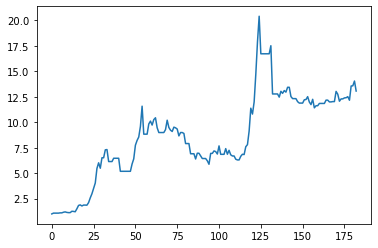

In [304]:
groupDf_["group5"].plot()